In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_excel("./dataset/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# reviewing the columns labels of the dataset.
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
dataset.shape # reviewing the shape of dataset before removing null valued column.

(5000, 14)

### Dropping Irrelavent Attributes

In [12]:
dataset.isnull().sum() # display number of null values for each attribute.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# Here we are dropping columns which have same values in all rows via pandas dataframe(ig any)
nunique = dataset.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataset1 = dataset.drop(cols_to_drop, axis=1)
dataset1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
dataset1.shape

(5000, 14)

In [15]:
# From the given Dataset the ID, ZIP Code Does not Impact the dataset and hence we are dropping the column ID, ZIP Code
dataset1.drop(["ID","ZIP Code"],axis=1,inplace=True)
dataset1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [16]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd59a765690>,
      dtype=object)

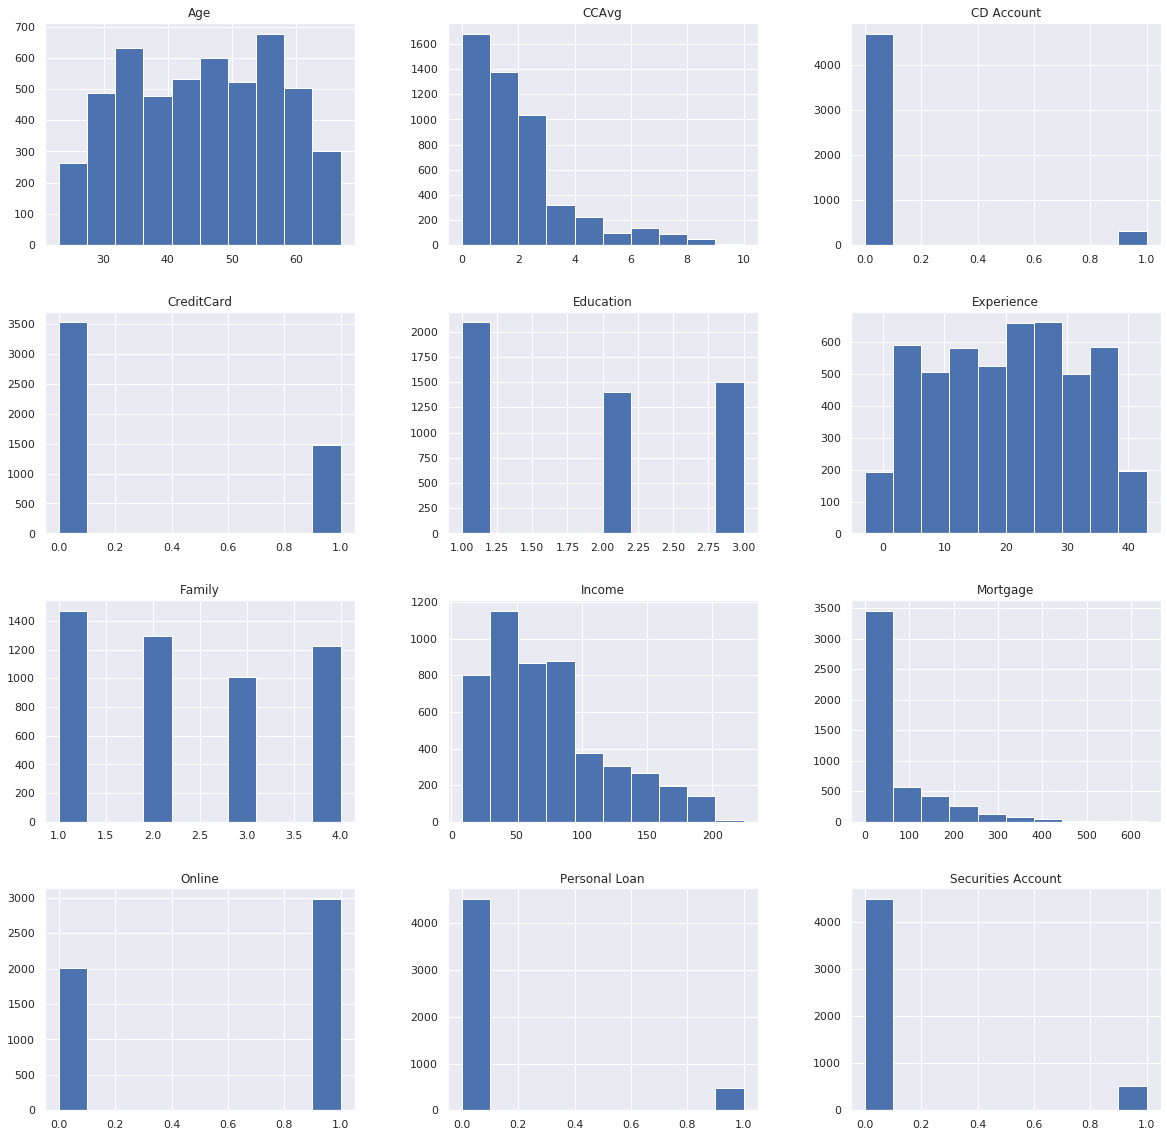

In [25]:
dataset1.hist(figsize=(20,20))     # plotting of Histogram

In [26]:
dataset1.median()    # Median

Age                   45.0
Experience            20.0
Income                64.0
Family                 2.0
CCAvg                  1.5
Education              2.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0
CreditCard             0.0
dtype: float64

In [27]:
dataset1.mode()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,35,32,44,1,0.3,1,0,0,0,0,1,0


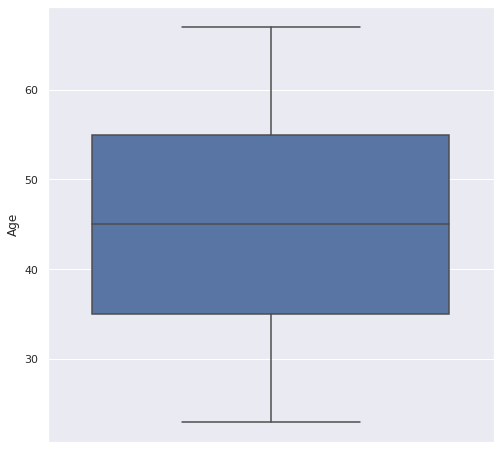

In [32]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Age"],orient='v')

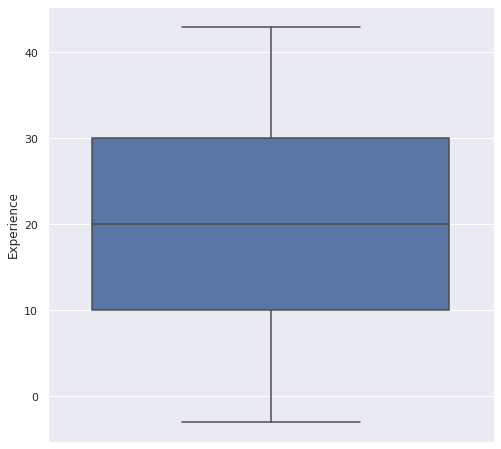

In [33]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset['Experience'],orient='v')

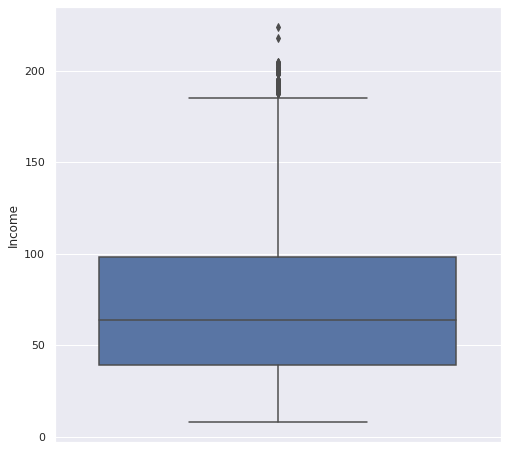

In [34]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Income"],orient='v')

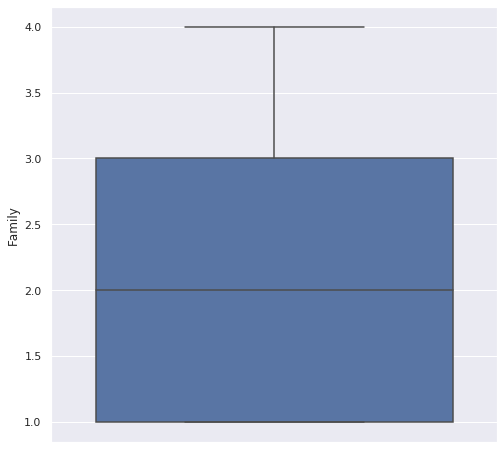

In [35]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Family"],orient='v')

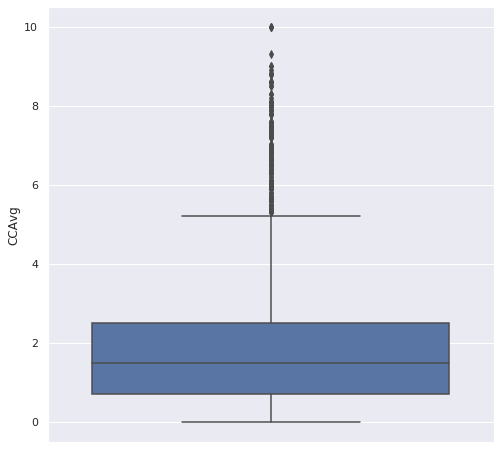

In [36]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["CCAvg"],orient='v')

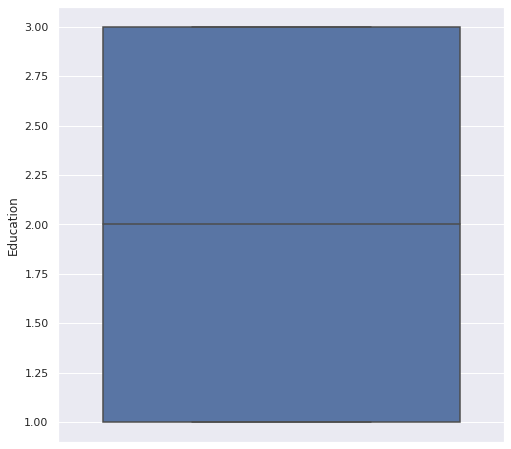

In [38]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Education"],orient='v')

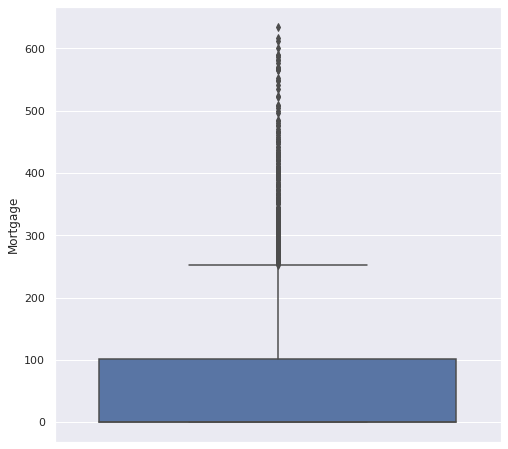

In [39]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Mortgage"],orient='v')

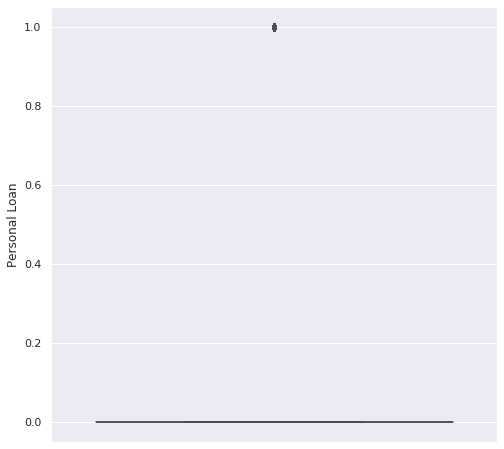

In [41]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Personal Loan"],orient='v')

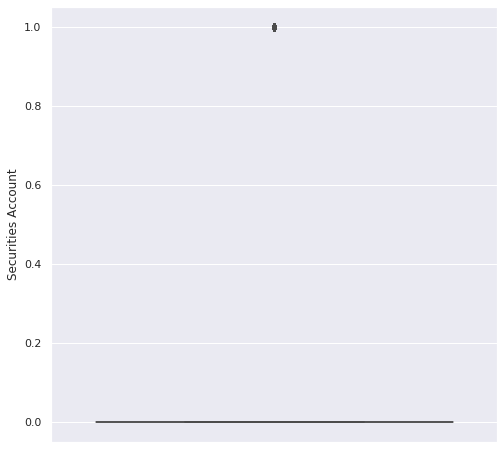

In [42]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Securities Account"],orient='v')

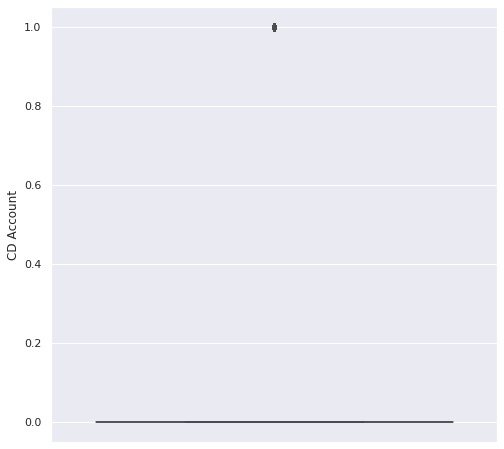

In [43]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["CD Account"],orient='v')

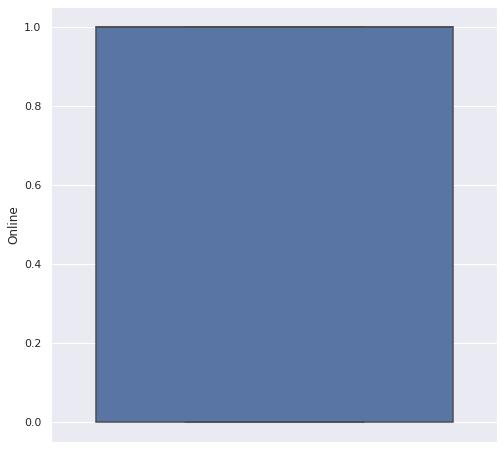

In [44]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["Online"],orient='v')

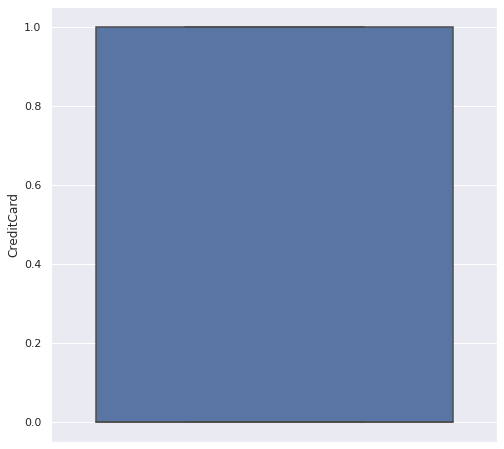

In [46]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["CreditCard"],orient='v')

In [1]:
sns.pairplot(dataset)

NameError: name 'sns' is not defined